In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [3]:
#train data
sarcasm_df = pd.read_csv("train.En.csv")
sarcasm_df.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
sarcasm_df = sarcasm_df[['tweet','sarcastic']]
sarcasm_df.head()

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1


In [5]:
#test data
test_A = pd.read_csv('task_A_En_test.csv')
test_A.head()

,text,sarcastic
0,"Size on the the Toulouse team, That pack is mo...",0
1,Pinball!,0
2,So the Scottish Government want people to get ...,1
3,villainous pro tip : change the device name on...,0
4,I would date any of these men 🥺,0


# EDA

In [5]:
sarcasm_df.shape

(3468, 2)

In [22]:
test_A.shape

(1400, 2)

In [6]:
sarcasm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      3467 non-null   object
 1   sarcastic  3468 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 54.3+ KB


In [7]:
sarcasm_df.isnull().sum()

tweet        1
sarcastic    0
dtype: int64

In [8]:
index = sarcasm_df[sarcasm_df['tweet'].isnull()].index
sarcasm_df['tweet'][index]

1062    NaN
Name: tweet, dtype: object

In [6]:
sarcasm_df.dropna(subset=['tweet'], inplace=True)

In [10]:
sarcasm_df.isnull().sum()

tweet        0
sarcastic    0
dtype: int64

In [11]:
test_A.isnull().sum()

text         0
sarcastic    0
dtype: int64

In [11]:
sarcasm_df.head()

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1


In [12]:
sarcasm_df.describe()

,sarcastic
count,3467.000000
mean,0.250072
std,0.433117
min,0.000000
25%,0.000000
50%,0.000000
75%,0.500000
max,1.000000


In [15]:
sarcasm_df['sarcastic'].value_counts()

0    2600
1     867
Name: sarcastic, dtype: int64

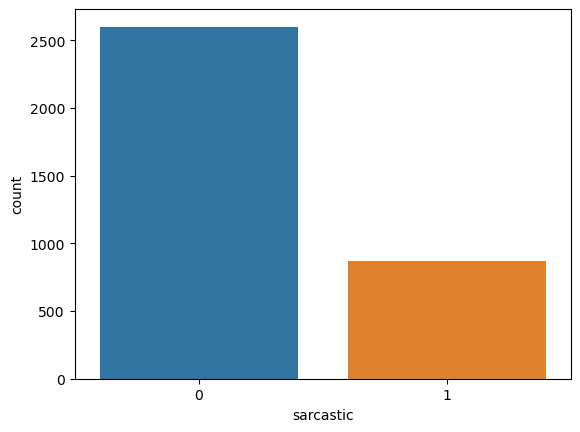

In [13]:
sns.countplot(x = sarcasm_df['sarcastic'], label = 'count')
plt.show()

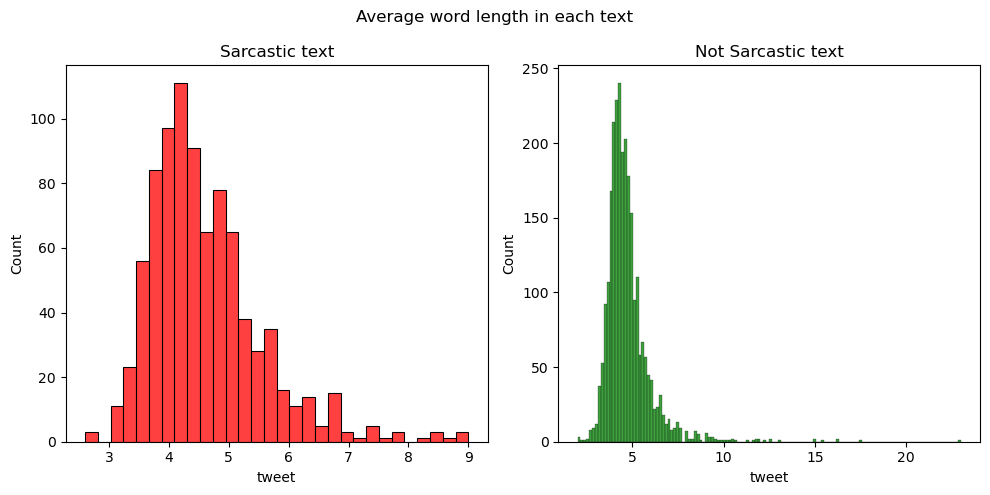

In [13]:
#average word length
sarcastic_text_lengths = sarcasm_df[sarcasm_df['sarcastic'] == 1]['tweet'].str.split().apply(lambda x: np.mean([len(i) for i in x]))
non_sarcastic_text_lengths = sarcasm_df[sarcasm_df['sarcastic'] == 0]['tweet'].str.split().apply(lambda x: np.mean([len(i) for i in x]))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram of average word lengths for sarcastic text
sns.histplot(ax=ax1, data=sarcastic_text_lengths, color='red')
ax1.set_title('Sarcastic text')

# Plot histogram of average word lengths for non-sarcastic text
sns.histplot(ax=ax2, data=non_sarcastic_text_lengths, color='green')
ax2.set_title('Not Sarcastic text')

# Set suptitle and adjust layout
fig.suptitle('Average word length in each text')
plt.tight_layout()
plt.show()

In [14]:
sarcasm_df['tweet'][1]

'I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\\_(ツ)_/¯'

In [15]:
sarcasm_df['tweet'][5]

'@jimrossignol I choose to interpret it as "XD": the universal emoticon for laughing at those poor, poor folks in Ubisoft\'s marketing department who have to deal with that branding until the servers quietly shut down 8 months after launch.'

In [14]:
sarcasm_df['tweet'].str.contains('https://').value_counts()


False    3204
True      263
Name: tweet, dtype: int64

In [15]:
sarcasm_df['tweet'].str.contains('@').value_counts()


False    2906
True      561
Name: tweet, dtype: int64

# Data cleaning

In [7]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def data_cleaning(tweet):
    text = [char for char in tweet if char not in string.punctuation] #remove punctuation
    text = ''.join(text)
    text = re.sub(r'[^\x00-\x7f]',r' ', text) #remove non ascii char
    text = re.sub(r'https?\S+', '', text) #remove urls
    text = re.sub('@[A-Za-z0-9_]+(:)?','', text) #remove_twitterhandle
    text = re.sub(r'[0-9]+', '', text)  #remove numbers
    text = re.sub('\s+', ' ', text) #remove extra sapces
    text = text.lower()
    
    lemmatizer = WordNetLemmatizer()

    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [10]:
sarcasm_df['clean'] = sarcasm_df['tweet'].apply(data_cleaning)
sarcasm_df['clean']

0                    thing got college caffeine addiction
1       love professor draw big question mark next ans...
2       remember hundred email company covid started g...
3       today poppop told forced go college okay sure ...
4       volphancarol littlewhitty mysticalmanatee also...
                              ...                        
3463            population spike chicago month ridiculous
3464    youd think second last english class year prof...
3465    finally surfacing holiday scotland difficult d...
3466    couldnt prouder today well done every student ...
3467    overheard year old game friend smell like tart...
Name: clean, Length: 3467, dtype: object

In [21]:
sarcasm_df['clean'].str.contains('https').value_counts()

False    3467
Name: clean, dtype: int64

In [23]:
sarcasm_df['clean'].str.contains('@').value_counts()

False    3467
Name: clean, dtype: int64

In [11]:
clean_test_A = test_A['text'].apply(data_cleaning)
clean_test_A

0       size toulouse team pack monstrous cant see wel...
1                                                 pinball
2       scottish government want people get booster sh...
3       villainous pro tip change device name bluetoot...
4                                          would date men
                              ...                        
1395                seen felt deserved retweet honesty xx
1396                                        omg earth pen
1397                         bringing kanye drake tl near
1398         love woman referred girl bos however men bos
1399    fact people still dont get need distance wear ...
Name: text, Length: 1400, dtype: object

# Wordcloud for Not Sarcastic words

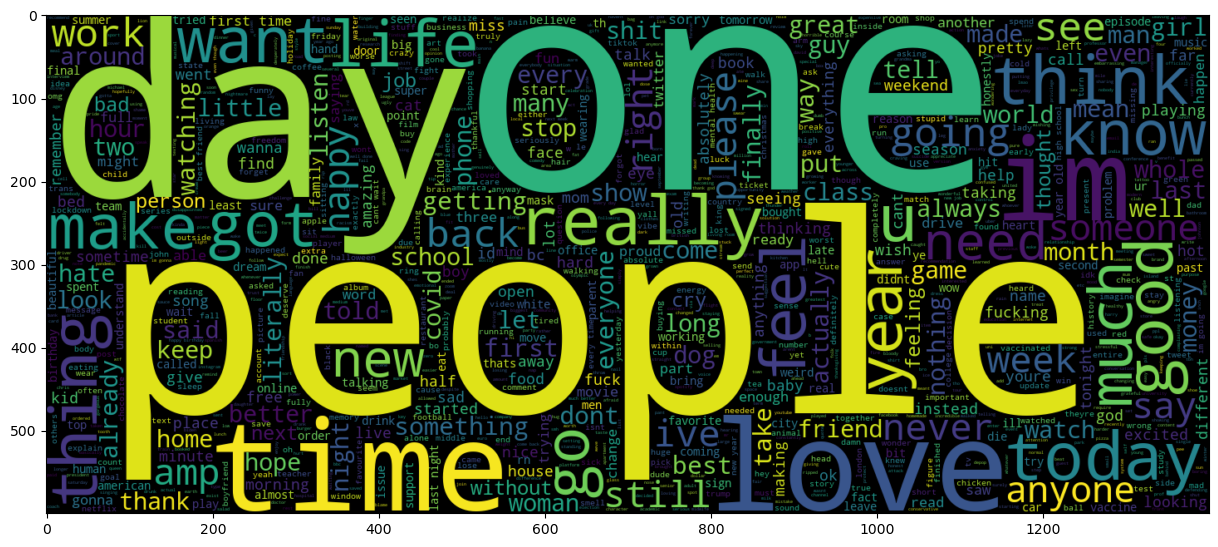

In [25]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wordcld = WordCloud(max_words = 1000 , width = 1400 , height = 600).generate(" ".join(sarcasm_df[sarcasm_df.sarcastic == 0].clean))
plt.imshow(wordcld , interpolation = 'bilinear')

# Wordcloud for Sarcastic words

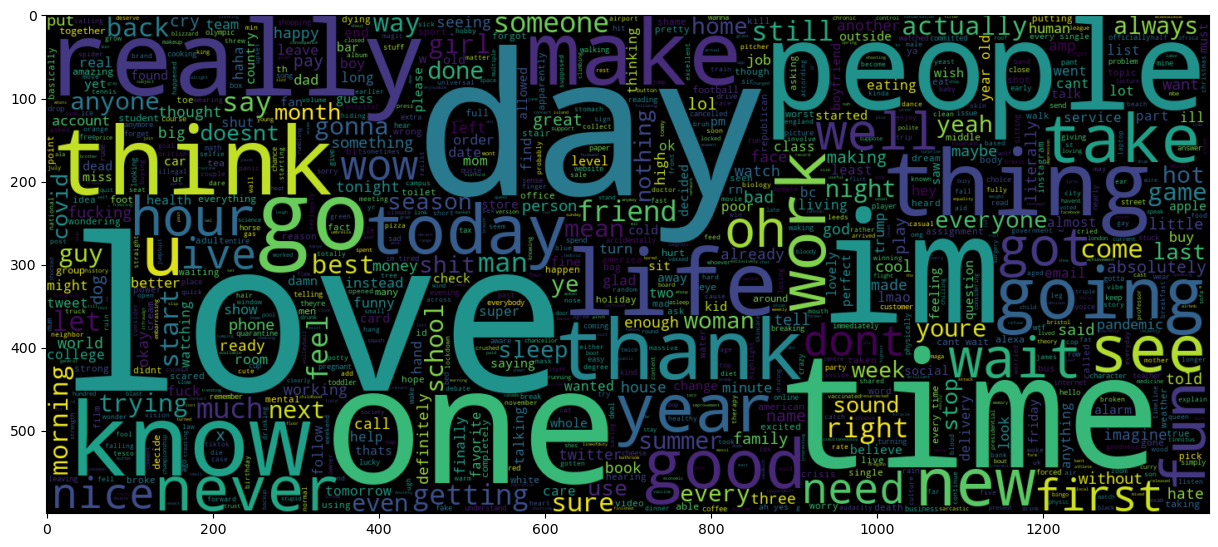

In [40]:
plt.figure(figsize = (15,15))
wordcld = WordCloud(max_words = 1000 , width = 1400 , height = 600).generate(" ".join(sarcasm_df[sarcasm_df.sarcastic == 1].clean))
plt.imshow(wordcld , interpolation = 'bilinear')

# TF-IDF Vectorization

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(sarcasm_df['clean'])


In [29]:
tfidf_train


<3467x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 17197 stored elements in Compressed Sparse Row format>

In [30]:
tfidf_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
tfidf_train.shape

(3467, 1000)

In [32]:
tfidf_test = tfidf_vectorizer.transform(clean_test_A)

In [33]:
tfidf_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
X_train = pd.DataFrame(tfidf_train.toarray())


In [35]:
X_test = pd.DataFrame(tfidf_test.toarray())

In [36]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210347,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.279960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y_train = sarcasm_df['sarcastic']

In [39]:
y_test = test_A['sarcastic']

# XGBoost

In [40]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


In [41]:
xgb =XGBClassifier(max_depth=8, n_estimators=1000)
predicted_labels = cross_val_predict(xgb, X_train, y_train, cv=5)

class_0_f1_score_xgb = f1_score(y_train, predicted_labels, average='macro', labels=[0])
class_1_f1_score_xgb = f1_score(y_train, predicted_labels, average='macro', labels=[1])

print('Class 1 f1 score ',class_1_f1_score_xgb)
print('Class 0 f1 score ',class_0_f1_score_xgb)

Class 1 f1 score  0.2671532846715328
Class 0 f1 score  0.8195542774982028


In [42]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [44]:
accuracy_xgb = accuracy_score(y_test, y_pred)
print('Accuracy of XGboost :', accuracy_xgb)
class_1_f1_xgb = f1_score(y_test, y_pred, labels = [1])
print('F1 score of XGBoost class 1 :', class_1_f1_xgb)
print(classification_report(y_test, y_pred))

Accuracy of XGboost : 0.7885714285714286
F1 score of XGBoost class 1 : 0.30188679245283023
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1200
           1       0.29      0.32      0.30       200

    accuracy                           0.79      1400
   macro avg       0.59      0.59      0.59      1400
weighted avg       0.80      0.79      0.79      1400



<Axes: >

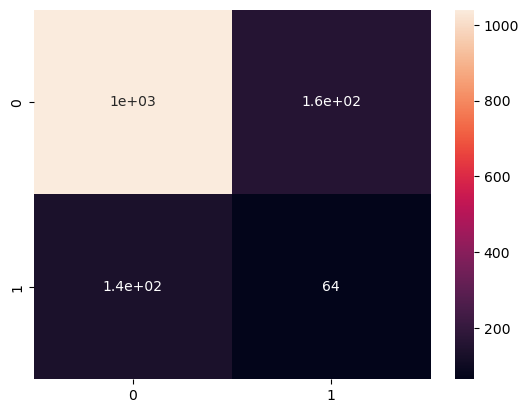

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

predicted_labels = cross_val_predict(knn, X_train, y_train, cv=5)

class_0_f1_score_knn = f1_score(y_train, predicted_labels, average='macro', labels=[0])
class_1_f1_score_knn = f1_score(y_train, predicted_labels, average='macro', labels=[1])

print('Class 1 f1 score ',class_1_f1_score_knn)
print('Class 0 f1 score ',class_0_f1_score_knn)


Class 1 f1 score  0.39797395079594794
Class 0 f1 score  0.1047345767575323


In [48]:

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [50]:
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of KNN :', accuracy_knn)
class_1_f1_knn = f1_score(y_test, y_pred, labels = [1])
print('F1 score of KNN class 1 :', class_1_f1_knn)
print(classification_report(y_test, y_pred))

Accuracy of KNN : 0.22285714285714286
F1 score of KNN class 1 : 0.2668463611859838
              precision    recall  f1-score   support

           0       0.98      0.10      0.17      1200
           1       0.15      0.99      0.27       200

    accuracy                           0.22      1400
   macro avg       0.57      0.54      0.22      1400
weighted avg       0.86      0.22      0.19      1400



<Axes: >

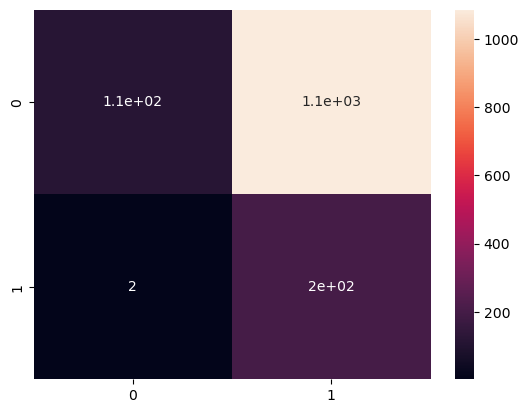

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# SVM

In [52]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel


predicted_labels = cross_val_predict(clf, X_train, y_train, cv=5)

class_0_f1_score_svm = f1_score(y_train, predicted_labels, average='macro', labels=[0])
class_1_f1_score_svm = f1_score(y_train, predicted_labels, average='macro', labels=[1])

print('Class 1 f1 score ',class_1_f1_score_svm)
print('Class 0 f1 score ',class_0_f1_score_svm)



Class 1 f1 score  0.09562563580874872
Class 0 f1 score  0.8506133422954125


In [53]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [54]:
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of SVM :', accuracy_svm)
class_1_f1_svm = f1_score(y_test, y_pred, labels = [1])
print('F1 score of SVM class 1 :', class_1_f1_svm)
print(classification_report(y_test, y_pred))

Accuracy of SVM : 0.8435714285714285
F1 score of SVM class 1 : 0.12749003984063745
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1200
           1       0.31      0.08      0.13       200

    accuracy                           0.84      1400
   macro avg       0.59      0.53      0.52      1400
weighted avg       0.79      0.84      0.80      1400



<Axes: >

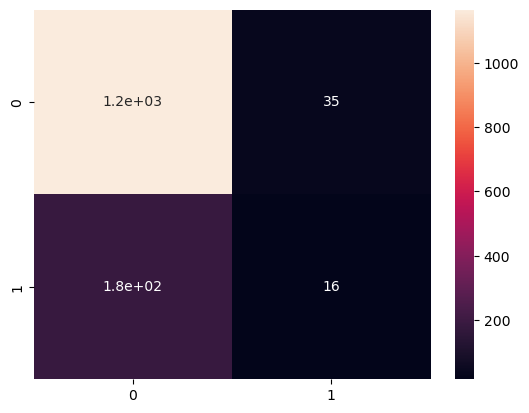

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# MLP

In [87]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(200,150,100,50), max_iter=400,activation = 'relu',solver='adam',random_state=1,alpha = 0.5)
predicted_labels = cross_val_predict(mlp, X_train, y_train, cv=5)

class_0_f1_score_mlp = f1_score(y_train, predicted_labels, average='macro', labels=[0])
class_1_f1_score_mlp = f1_score(y_train, predicted_labels, average='macro', labels=[1])

print('Class 1 f1 score ',class_1_f1_score_mlp)
print('Class 0 f1 score ',class_0_f1_score_mlp)


Class 1 f1 score  0.28285523682454966
Class 0 f1 score  0.8022079116835327


In [88]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [89]:
accuracy_mlp = accuracy_score(y_test, y_pred)
print('Accuracy of MLP :', accuracy_mlp)
class_1_f1_mlp = f1_score(y_test, y_pred, labels = [1])
print('F1 score of MLP class 1 :', class_1_f1_mlp)
print(classification_report(y_test, y_pred))

Accuracy of MLP : 0.7707142857142857
F1 score of MLP class 1 : 0.2850779510022272
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1200
           1       0.26      0.32      0.29       200

    accuracy                           0.77      1400
   macro avg       0.57      0.58      0.57      1400
weighted avg       0.79      0.77      0.78      1400



<Axes: >

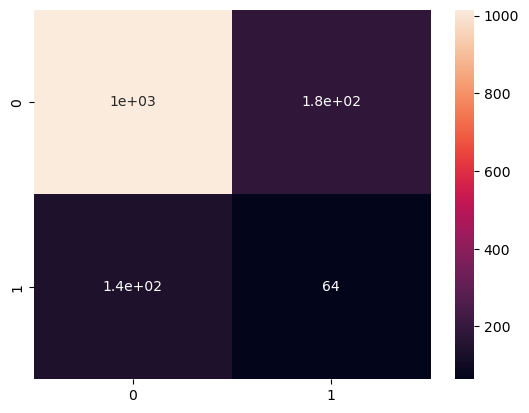

In [90]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Result Analysis

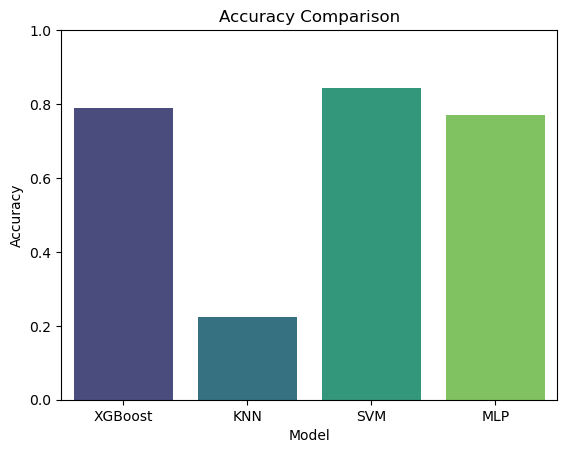

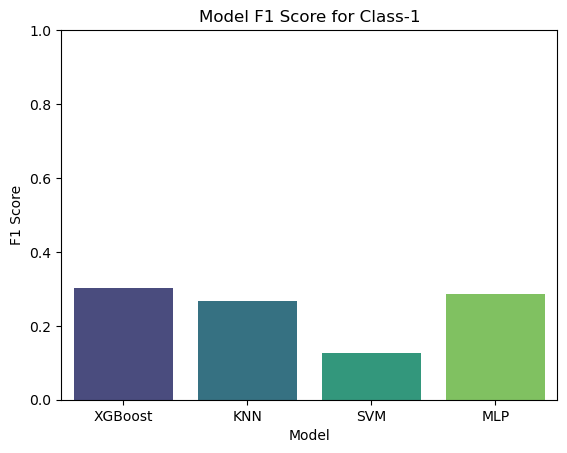

In [94]:
import matplotlib.pyplot as plt

model_names = ["XGBoost", "KNN", "SVM","MLP"]
accuracy_scores = [accuracy_xgb, accuracy_knn, accuracy_svm, accuracy_mlp]  
f1_scores = [class_1_f1_xgb, class_1_f1_knn, class_1_f1_svm, class_1_f1_mlp]  


data = pd.DataFrame({"Model": model_names, "Accuracy": accuracy_scores, "F1 Score": f1_scores})
 
# Show the plot
sns.barplot(x="Model", y="Accuracy", data=data, palette="viridis")
plt.title("Accuracy Comparison")
plt.ylim(0, 1.0)  # Adjust the y-axis limit as needed
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# Create a bar plot for F1 Score
sns.barplot(x="Model", y="F1 Score", data=data, palette="viridis")
plt.title(f"Model F1 Score for Class-1")
plt.ylim(0, 1.0)  # Adjust the y-axis limit as needed
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()


# Hypothesis Testing- Kruskal

In [151]:
from scipy.stats import kruskal

from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit


In [146]:

num_samples_train = 2000
num_samples_test = 300

sss_train = StratifiedShuffleSplit(n_splits=1, train_size=num_samples_train, random_state=1)
sss_test = StratifiedShuffleSplit(n_splits=1, test_size=num_samples_test, random_state=1)

indices_train = next(sss_train.split(X_train, y_train))
indices_test = next(sss_test.split(X_test, y_test))

subset_X_train = X_train.iloc[indices_train[0]]  
subset_y_train = y_train.iloc[indices_train[0]]

subset_X_test = X_test.iloc[indices_test[1]]  
subset_y_test = y_test.iloc[indices_test[1]]



In [147]:
subset_X_train

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.29036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
subset_y_train.value_counts()

0    1500
1     500
Name: sarcastic, dtype: int64

In [149]:
xgb.fit(subset_X_train, subset_y_train)
mlp.fit(subset_X_train,subset_y_train)
knn.fit(subset_X_train,subset_y_train)

xgb_predictions = xgb.predict(subset_X_test)
mlp_predictions = mlp.predict(subset_X_test)
knn_predictions = knn.predict(subset_X_test)

xgb_f1_class1 = f1_score(subset_y_test, xgb_predictions, labels = [1])
mlp_f1_class1 = f1_score(subset_y_test, mlp_predictions, labels = [1])
knn_f1_class1 = f1_score(subset_y_test, knn_predictions, labels = [1])


In [155]:
print("Null hypothesis: There is no significant difference in F1 scores for class 1 among the models")

Null hypothesis: There is no significant difference in F1 scores for class 1 among the models


In [161]:
h_statistic, p_value = stats.kruskal([xgb_f1_class1], [mlp_f1_class1],[knn_f1_class1])

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Kruskal-Wallis: There is a significant difference in F1 scores among the models.")
else:
    print("Kruskal-Wallis: There is no significant difference in F1 scores among the models.")
    
# Print the h-statistic, p-value, and F1 scores for class 1
print(f"t-statistic: {h_statistic}")
print(f"p-value: {p_value}")
print(f"XGBoost F1 Score for class 1: {xgb_f1_class1}")
print(f"MLP F1 Score for class 1: {mlp_f1_class1}")
print(f"KNN F1 Score for class 1: {knn_f1_class1}")

Kruskal-Wallis: There is no significant difference in F1 scores among the models.
t-statistic: 2.0
p-value: 0.36787944117144245
XGBoost F1 Score for class 1: 0.25490196078431376
MLP F1 Score for class 1: 0.33333333333333337
KNN F1 Score for class 1: 0.04444444444444444
